In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix,precision_score,
                           roc_auc_score, roc_curve, precision_recall_curve,recall_score,
                           average_precision_score, f1_score, accuracy_score)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
# Set style for beautiful visualizations
plt.style.use('default')
sns.set_palette("husl")

print(" All libraries imported successfully!")

 All libraries imported successfully!


In [6]:
df = pd.read_csv('creditcard.csv')

In [80]:
print(f" Dataset Shape: {df.shape}")

 Dataset Shape: (284807, 31)


In [81]:
print("\n" + "="*50)
print(" DATASET OVERVIEW")
print("="*50)
print(df.info())


 DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

In [10]:
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
# Check for missing values
print("\n MISSING VALUES:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

if missing_data.sum() == 0:
    print(" No missing values found!")


 MISSING VALUES:
Series([], dtype: int64)
 No missing values found!


In [78]:
# Check class distribution
print("\n CLASS DISTRIBUTION:")
class_distribution = df['Class'].value_counts()
print(class_distribution)
print(f"Fraud Percentage: {(class_distribution[1] / len(df)) * 100:.3f}%")


 CLASS DISTRIBUTION:
Class
0    284315
1       492
Name: count, dtype: int64
Fraud Percentage: 0.173%


Performing Exploratory Data Analysis...


Text(0.5, 0.95, ' Credit Card Fraud Detection - Exploratory Data Analysis')

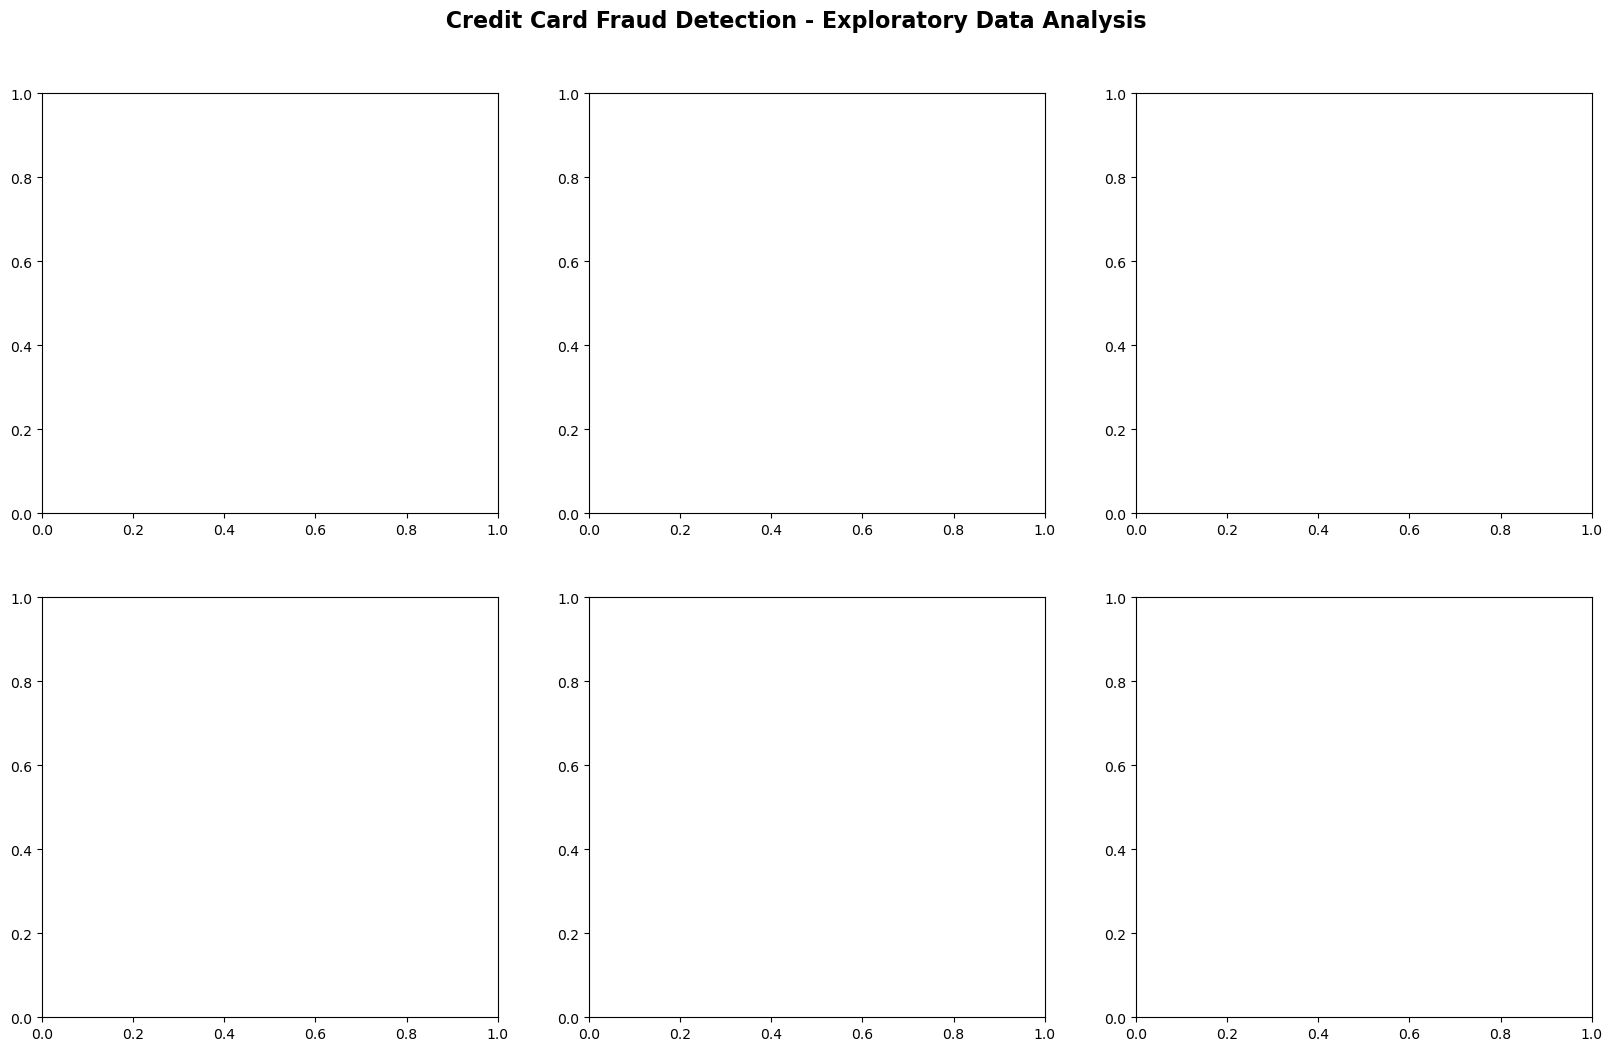

In [79]:
print("Performing Exploratory Data Analysis...")

# Create a comprehensive EDA section
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle(' Credit Card Fraud Detection - Exploratory Data Analysis', 
             fontsize=16, fontweight='bold', y=0.95)

In [17]:
# 1. Class Distribution
class_counts = df['Class'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0,0].pie(class_counts.values, labels=['Legitimate', 'Fraudulent'], 
              autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Transaction Class Distribution', fontweight='bold')

Text(0.5, 1.0, 'Transaction Class Distribution')

In [18]:
# 2. Amount Distribution by Class
sns.boxplot(data=df, x='Class', y='Amount', ax=axes[0,1], palette=colors)
axes[0,1].set_title('Transaction Amount by Class', fontweight='bold')
axes[0,1].set_xticklabels(['Legitimate', 'Fraudulent'])
axes[0,1].set_yscale('log')  # Log scale for better visualization


In [19]:
# 3. Time Distribution
sns.histplot(data=df, x='Time', hue='Class', ax=axes[0,2], 
             palette=colors, alpha=0.6, bins=50)
axes[0,2].set_title('Transaction Time Distribution', fontweight='bold')

Text(0.5, 1.0, 'Transaction Time Distribution')

In [20]:
# 4. Correlation Heatmap (Top 10 features)
correlation_with_class = df.corr()['Class'].sort_values(ascending=False)
top_features = correlation_with_class.index[1:11]  # Exclude Class itself

corr_matrix = df[top_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            ax=axes[1,0], fmt='.2f')
axes[1,0].set_title('Top 10 Features Correlation Heatmap', fontweight='bold')

Text(0.5, 1.0, 'Top 10 Features Correlation Heatmap')

In [21]:
# 5. Feature V14 Distribution (Most negatively correlated feature)
sns.histplot(data=df, x='V14', hue='Class', ax=axes[1,1], 
             palette=colors, alpha=0.6, bins=50)
axes[1,1].set_title('Feature V14 Distribution (Most Negatively Correlated)')


Text(0.5, 1.0, 'Feature V14 Distribution (Most Negatively Correlated)')

In [22]:

# 6. Fraudulent Transactions Over Time
fraud_df = df[df['Class'] == 1]
legit_df = df[df['Class'] == 0].sample(1000)  # Sample for visualization

axes[1,2].scatter(legit_df['Time'], legit_df['Amount'], 
                 alpha=0.5, label='Legitimate', color=colors[0], s=10)
axes[1,2].scatter(fraud_df['Time'], fraud_df['Amount'], 
                 alpha=0.8, label='Fraudulent', color=colors[1], s=30)
axes[1,2].set_xlabel('Time')
axes[1,2].set_ylabel('Amount')
axes[1,2].set_title('Transactions: Time vs Amount', fontweight='bold')
axes[1,2].legend()
axes[1,2].set_yscale('log')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>


💡 KEY INSIGHTS FROM EDA
• Total Transactions: 284,807
• Fraudulent Transactions: 492 (0.173%)
• Highly Imbalanced Dataset (Common in fraud detection)
• Most correlated features: ['V11', 'V4', 'V2', 'V21', 'V19']
• Fraudulent transactions have different amount distributions
• Time patterns differ between legitimate and fraudulent transactions

📊 TOP CORRELATED FEATURES WITH FRAUD


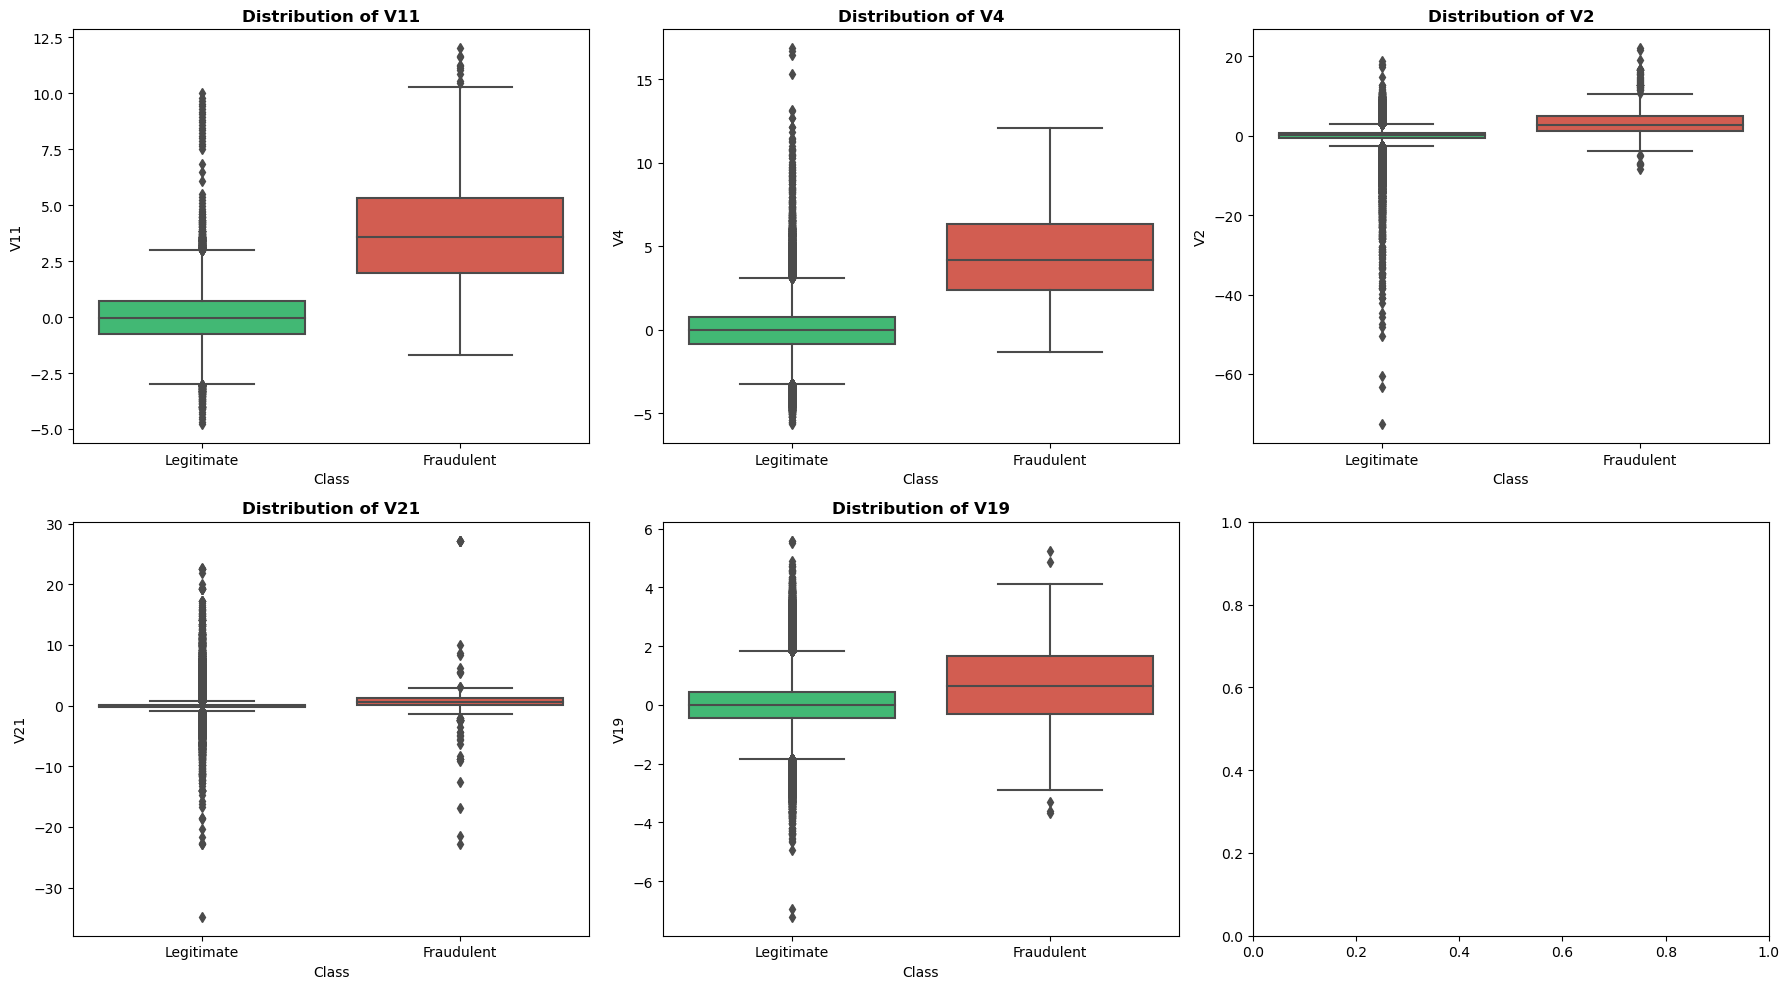

In [23]:
# Print key insights
print("\n" + "="*50)
print(" KEY INSIGHTS FROM EDA")
print("="*50)
print(f"• Total Transactions: {len(df):,}")
print(f"• Fraudulent Transactions: {df['Class'].sum():,} ({df['Class'].mean()*100:.3f}%)")
print(f"• Highly Imbalanced Dataset (Common in fraud detection)")
print(f"• Most correlated features: {list(correlation_with_class.index[1:6])}")
print(f"• Fraudulent transactions have different amount distributions")
print(f"• Time patterns differ between legitimate and fraudulent transactions")

# Additional EDA - Feature distributions for top correlated features
print("\n" + "="*50)
print(" TOP CORRELATED FEATURES WITH FRAUD")
print("="*50)

top_correlated = correlation_with_class.index[1:6]  # Top 5 features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(top_correlated[:6]):
    row, col = i // 3, i % 3
    sns.boxplot(data=df, x='Class', y=feature, ax=axes[row, col], palette=colors)
    axes[row, col].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[row, col].set_xticklabels(['Legitimate', 'Fraudulent'])

plt.tight_layout()
plt.show()

In [25]:
#PREPROCESSING DATA

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [26]:

print(f"Features shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

Features shape: (284807, 30)
Target distribution: {0: 284315, 1: 492}


In [30]:

# Handle class imbalance with RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(f"Balanced - Features: {X_resampled.shape}, Target: {pd.Series(y_resampled).value_counts().to_dict()}")

Balanced - Features: (984, 30), Target: {0: 492, 1: 492}


In [32]:
# Scale features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [40]:
print(f"\n Data Split:")
print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Testing set: {X_test.shape[0]:,} samples")
print(f"Fraud ratio in training: {y_train.mean():.3f}")
print(f"Fraud ratio in testing: {y_test.mean():.3f}")


 Data Split:
Training set: 787 samples
Testing set: 197 samples
Fraud ratio in training: 0.501
Fraud ratio in testing: 0.497


In [41]:
# Original data split (for comparison)
X_original = df.drop('Class', axis=1)
y_original = df['Class']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, stratify=y_original
)

In [42]:
print(f"\n Original Data Split (Imbalanced):")

print(f"Training set: {X_train_orig.shape[0]:,} samples")
print(f"Testing set: {X_test_orig.shape[0]:,} samples")

print(f"Fraud ratio in training: {y_train_orig.mean():.3f}")
print(f"Fraud ratio in testing: {y_test_orig.mean():.3f}")


 Original Data Split (Imbalanced):
Training set: 227,845 samples
Testing set: 56,962 samples
Fraud ratio in training: 0.002
Fraud ratio in testing: 0.002


In [50]:
# Training Multiple Machine Learning Models

# Define models to compare (all from scikit-learn)
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


In [51]:
# Train and evaluate models
results = {}

In [53]:
# Testing the models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f" {name} trained - F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")

Training Logistic Regression...
 Logistic Regression trained - F1: 0.9490, ROC-AUC: 0.9822
Training Random Forest...
 Random Forest trained - F1: 0.9534, ROC-AUC: 0.9901
Training Support Vector Machine...
 Support Vector Machine trained - F1: 0.9368, ROC-AUC: 0.9868
Training Gradient Boosting...
 Gradient Boosting trained - F1: 0.9447, ROC-AUC: 0.9889
Training Decision Tree...
 Decision Tree trained - F1: 0.9100, ROC-AUC: 0.9087


In [54]:
# Create comparison DataFrame
results_df = pd.DataFrame({
    model: [results[model]['accuracy'], 
            results[model]['f1_score'],
            results[model]['roc_auc'],
            results[model]['avg_precision']] 
    for model in results.keys()
}, index=['Accuracy', 'F1-Score', 'ROC-AUC', 'Average Precision']).T


In [55]:
print(" MODEL PERFORMANCE COMPARISON\n")

display(results_df.round(4))

 MODEL PERFORMANCE COMPARISON



,Accuracy,F1-Score,ROC-AUC,Average Precision
Logistic Regression,0.9492,0.9490,0.9822,0.9870
Random Forest,0.9543,0.9534,0.9901,0.9915
Support Vector Machine,0.9391,0.9368,0.9868,0.9876
Gradient Boosting,0.9442,0.9447,0.9889,0.9910
Decision Tree,0.9086,0.9100,0.9087,0.8640


In [56]:
# Visualize model comparison
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

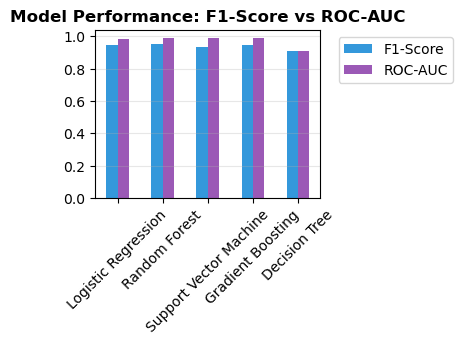

In [58]:
#  F1-Score and ROC-AUC Comparison

plt.subplot(2, 2, 1)
metrics_plot = results_df[['F1-Score', 'ROC-AUC']]
metrics_plot.plot(kind='bar', ax=plt.gca(), color=['#3498db', '#9b59b6'])
plt.title('Model Performance: F1-Score vs ROC-AUC', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

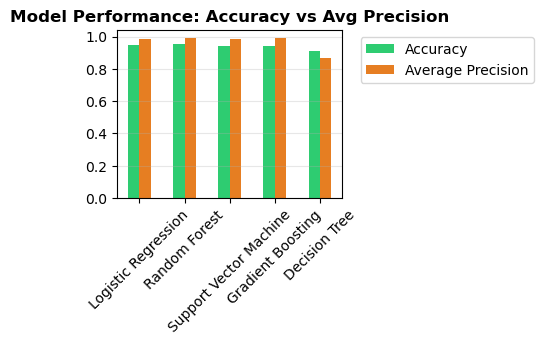

In [59]:
#  Accuracy and Average Precision
plt.subplot(2, 2, 2)
accuracy_plot = results_df[['Accuracy', 'Average Precision']]
accuracy_plot.plot(kind='bar', ax=plt.gca(), color=['#2ecc71', '#e67e22'])
plt.title('Model Performance: Accuracy vs Avg Precision', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

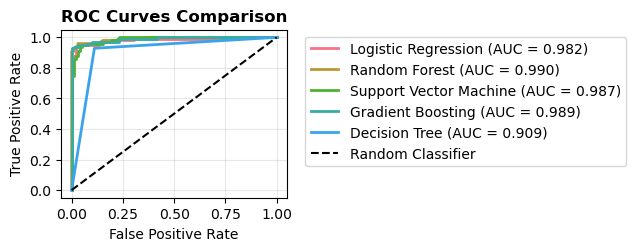

In [60]:
# ROC Curves
plt.subplot(2, 2, 3)
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

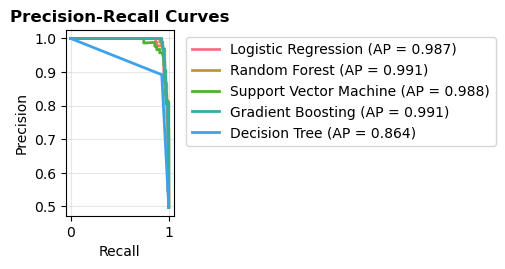

In [61]:
#  Precision-Recall Curves
plt.subplot(2, 2, 4)
for name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test, result['probabilities'])
    plt.plot(recall, precision, label=f'{name} (AP = {result["avg_precision"]:.3f})', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [63]:
# Identify best model

best_model_name = results_df['F1-Score'].idxmax()
best_model = results[best_model_name]['model']
print(f"\n BEST MODEL: {best_model_name}")
print(f" Best F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")


 BEST MODEL: Random Forest
 Best F1-Score: 0.9534


In [66]:
# TEST ON ORIGINAL IMBALANCED DATA


# Prepare original test data
X_test_orig_scaled = scaler.transform(X_test_orig)
y_pred_orig = best_model.predict(X_test_orig_scaled)
y_pred_proba_orig = best_model.predict_proba(X_test_orig_scaled)[:, 1]


In [75]:
# Calculate metrics on original data
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
precision_orig = precision_score(y_test_orig, y_pred_orig)
recall_orig = recall_score(y_test_orig, y_pred_orig)
f1_orig = f1_score(y_test_orig, y_pred_orig)
roc_auc_orig = roc_auc_score(y_test_orig, y_pred_proba_orig)

In [76]:
print(" Performance on Original Imbalanced Test Set:")
print(f"• Accuracy: {accuracy_orig:.4f}")
print(f"• Precision: {precision_orig:.4f}")
print(f"• Recall: {recall_orig:.4f}")
print(f"• F1-Score: {f1_orig:.4f}")
print(f"• ROC-AUC: {roc_auc_orig:.4f}")

 Performance on Original Imbalanced Test Set:
• Accuracy: 0.9695
• Precision: 0.0528
• Recall: 0.9898
• F1-Score: 0.1003
• ROC-AUC: 0.9980


In [77]:
# Confusion matrix for original data
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
print(f"\n Confusion Matrix (Original Data):")
print(cm_orig)


📋 Confusion Matrix (Original Data):
[[55125  1739]
 [    1    97]]
